In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Are we running a built-in model in this lab ? -> NO
# Therefore in this file we are practicing data pre-processing, and feature engineering.


## Date & time exercises (without loading the data)

#### The Apollo 11 mission landed on the moon on  July 20th, 1969
 * What day of week was it?
 * How many days elapsed since the landing till now?
 * Was that a leap year?

In [22]:
time = pd.to_datetime("July 20th, 1969")
print(time)
print(type(time))

1969-07-20 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [23]:
time.day_name()

'Sunday'

In [24]:
time.day_of_week

time_now = pd.Timestamp.now()
print(time_now)
# we can manipulate date values from within the dataframe by :
# Eg, by substracting today's date and time
time_since = pd.Timestamp.now() - time
print(time_since)

2024-11-24 17:35:53.542216
20216 days 17:35:53.542216


## Active Satellites in Orbit Around Earth
 * The CSV file is on GitHub in the same folder as this notebook
 * Data Source: https://www.kaggle.com/ucsusa/active-satellites

In [25]:
df = pd.read_csv('active_satellites.csv')

In [26]:
# Here is the International Space Station (ISS) in this list
# .str -> allows us to use string methods on the column
df[df['Official Name of Satellite'].str.contains('tation')].T

,657
Official Name of Satellite,International Space Station
Country/Organization of UN Registry,USA
Operator/Owner,NASA/Multinational
Country of Operator/Owner,Multinational
Users,Government
Purpose,Space Science
Detailed Purpose,NaN
Class of Orbit,LEO
Type of Orbit,Non-Polar Inclined
Longitude of Geosynchronous Orbit (Degrees),0.0


#### The olny column with dates is 'Date of Launch'. By default it is loaded as string. Convert the column (or create a new one) so that it contains parsed dates. Let's call it "launched". (feel free to rename other columns as needed for convenience)

In [27]:
df['launched'] = pd.to_datetime(df['Date of Launch'])

#### Remember that we can access the date/time specific functions of Timestamp columns using "dt"

In [ ]:
print(df["launched"].head())

# # For example to get the year use
# dt -> data time specific functions
df['launched'].dt.year

0   2016-04-25
1   2014-02-06
2   2016-06-15
3   1997-08-19
4   2015-03-02
Name: launched, dtype: datetime64[ns]


0       2016.0
1       2014.0
2       2016.0
3       1997.0
4       2015.0
         ...  
1415    2008.0
1416    2015.0
1417    2011.0
1418    2012.0
1419    2016.0
Name: launched, Length: 1420, dtype: float64

#### dt.year returns an integer but the output from the cell above contains the years in a Series object with float data type. Why is it float and not integer?"
Hint: missing values and NaN

In [ ]:
print(df['Date of Launch'].isnull().any())
print(df['Date of Launch'].isnull().count()) # how many null values are there in this column


# When we add the any() method chained at the end we can see if there is at least 1 empty or null cell in this column


True
1420


#### Are there any rows with missing launch date? How is this missing data represented in the converted Timestamp column?


In [33]:
print(df["Date of Launch"].isnull().any()) # how many null values are there in this column

True



#### Drop the rows with missing data. Recompute the 'launched' column and observe that it's now integer

In [38]:
df.launched.isnull().any() # Do we have any empty cells
df = df.dropna(subset=["Date of Launch"]) # drop all rows with empty cells in the Date of Launch column
df['launched'] = pd.to_datetime(df['Date of Launch'])

#### Plot a histogram of the launch date

<Axes: >

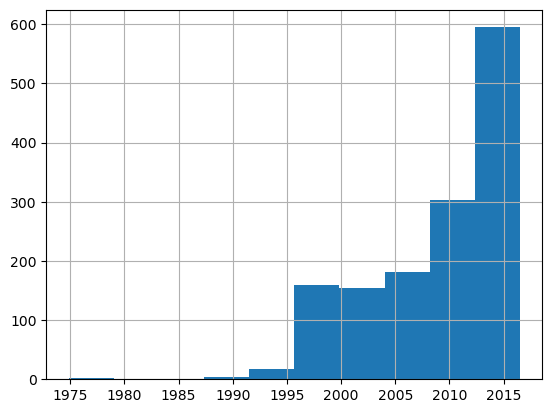

In [43]:
df[df["Date of Launch"].isnull()] # check if there are any empty cells in the Date of Launch column
df.launched.hist() # plot a histogram of the launched column


#### The histogram above is nice, but it places bin boundaries in some weird places. Let's compute the number of launches each year and then plot it (as either a bar or scatter plot - try both)
 * Hints: use either value_counts() or groupby() to calculate the counts, see the example below:

31
year
1974      1
1978      1
1988      1
1989      1
1990      2
1991      1
1992      1
1993      5
1994      6
1995      8
1996     14
1997     55
1998     60
1999     40
2000     39
2001     22
2002     45
2003     35
2004     33
2005     36
2006     48
2007     59
2008     60
2009     69
2010     74
2011     91
2012     89
2013    122
2014    150
2015    173
2016     75
Name: Official Name of Satellite, dtype: int64


<Axes: >

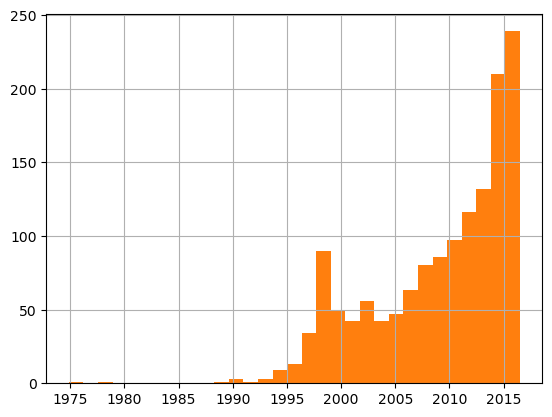

In [ ]:
# -------- valuecounts() -------------
# Now we can see that the column has been cleaned
# df.hist(column='launched', bins=25)
numBins = df.launched.dt.year.value_counts() # counts the unique groups in the launched column
# print(len(numBins))
# df.launched.hist(bins=len(numBins)) # Dynamic number of bins based on the number of unique years

# ------ Alternative solution with groupby

df['year'] = df.launched.dt.year  # for setting a new column, must use the associated array syntax
numBinsGBy = df.groupby('year')["Official Name of Satellite"].count()
print(numBinsGBy)
print(len(numBinsGBy))


# df.groupby('year') is different from df.year

# Use the numBinsGBy for a new plot 
df.launched.hist(bins=len(numBinsGBy))

## Example of using value_counts() + bar plot

In [50]:
country_count = df['Country of Operator/Owner'].value_counts()
country_count.head()

Country of Operator/Owner
USA              558
China            179
Russia           136
Multinational     67
Japan             57
Name: count, dtype: int64

<Axes: xlabel='Country of Operator/Owner'>

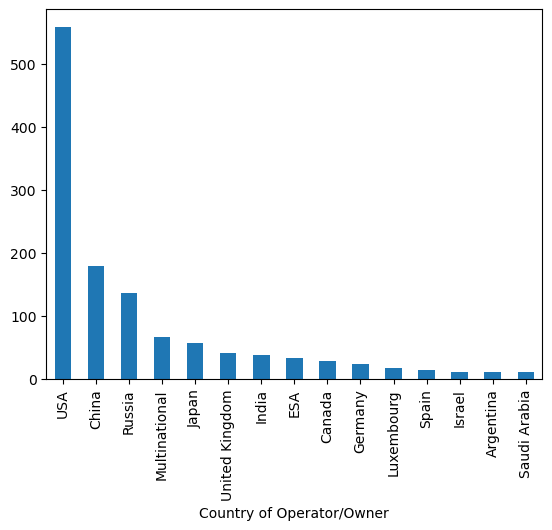

In [51]:
country_count[country_count>10].plot(kind='bar')

#### Plot a similar chart for launch vehicle

158
Launch Vehicle
Ariane                    1
Ariane  5 ECA             1
Ariane 4                  6
Ariane 42L                3
Ariane 42P                2
                         ..
Zenit 2SB                 1
Zenit 3                   1
Zenit 3SL                26
Zenit 3SLB                4
Zenit 3SLBF/Fregat SB     1
Name: Official Name of Satellite, Length: 158, dtype: int64


(-0.5, 79.5)

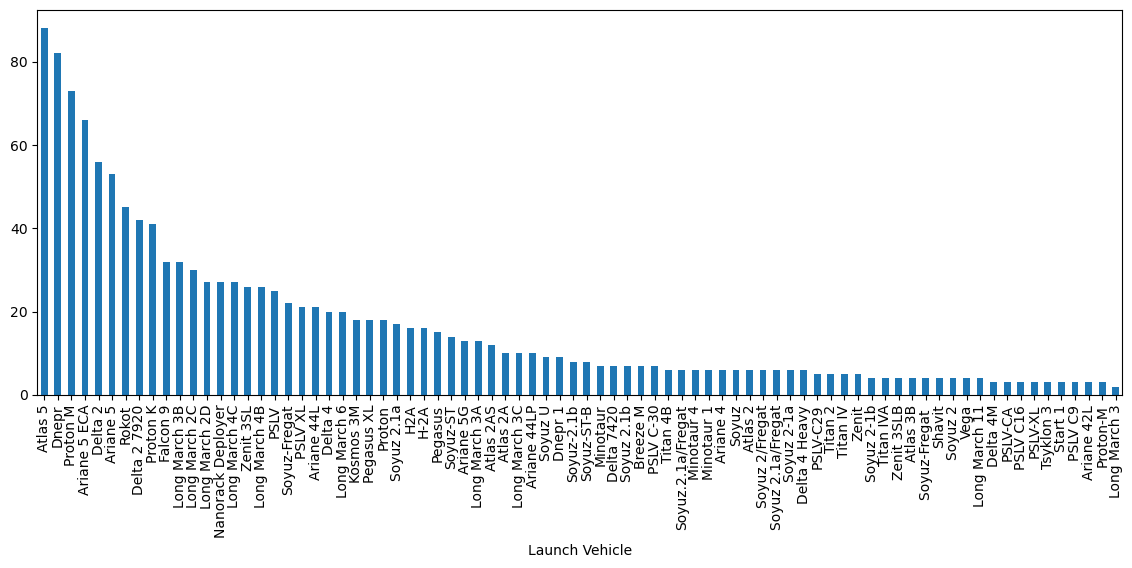

In [67]:
launch_vehicle_unique = df["Launch Vehicle"].value_counts()

# print(launch_vehicle_unique)
print(len(launch_vehicle_unique))


# Equivalent with group by 
launch_vehicle_unique_GBy = df.groupby("Launch Vehicle")["Official Name of Satellite"].count()
print(launch_vehicle_unique_GBy)


plt.figure(figsize=(14, 5))
graph =launch_vehicle_unique.plot(kind="bar")  # because this is the pandas plot function, we need to specify the type of plot

graph.get_xlim()
graph.set_xlim(-0.5, (len(launch_vehicle_unique)/2 + 0.5)) # set the x-axis limits to be the same as the number of unique values


#### Now plot the same counts as pie chart (kind='pie'). Group all the small groups (e.g. below 10 satellites) into a single "Other" category

<Axes: ylabel='count'>

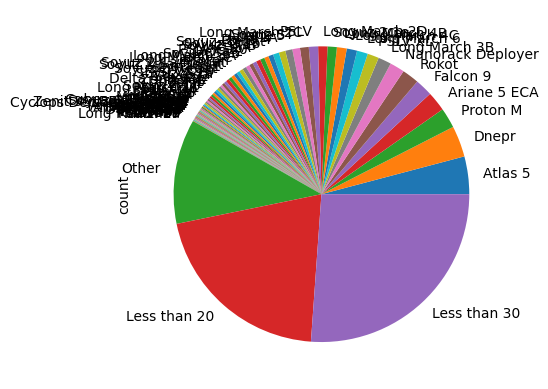

In [ ]:
lv_count = df[df.launched.dt.year>2010]['Launch Vehicle'].value_counts()
threshold = 10
threshold2 = 20
threshold3 = 30

veh_less_10 = lv_count[lv_count<threshold] # conditional indexing
lv_count["Other"] = veh_less_10.sum()  # create a new, comined column of the ones that have less satelites

veh_less_20 = lv_count[lv_count<threshold2]
lv_count["Less than 20"] = veh_less_20.sum()


veh_less_30 = lv_count[lv_count<threshold3]
lv_count["Less than 30"] = veh_less_30.sum()
lv_count.plot(kind="pie")

#### Note that there are many versions of the same rocket, like Ariane 5 and Ariane 5 ECA - each creating a separate slice on the pie chart. This is why we have so many slices. Do the counts by Launch vehicle family, where family can be defined by the first word of the vehicle name. (remember the .str accessor for string functions) 

<Axes: xlabel='Launch Vehicle'>

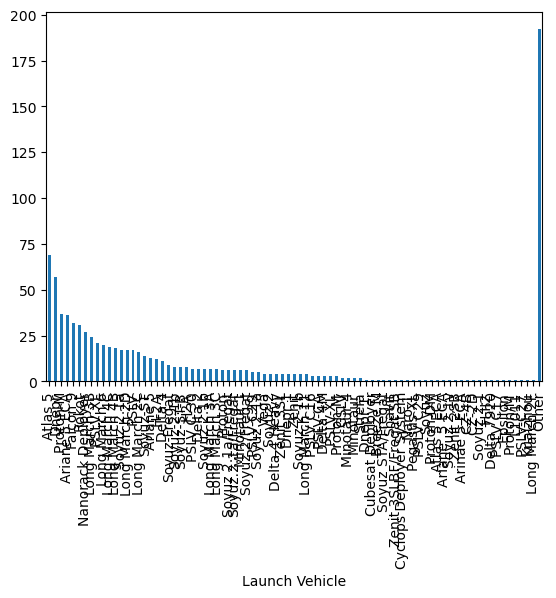

In [71]:
lv_count.plot(kind="bar")

#### Make a bar plot for launch counts per day of week (day 0 is Monday). Make sure the labels on x axis are reasonably sorted. Looks like Wednesday and Thursday are far more popular days to launch a satellite.

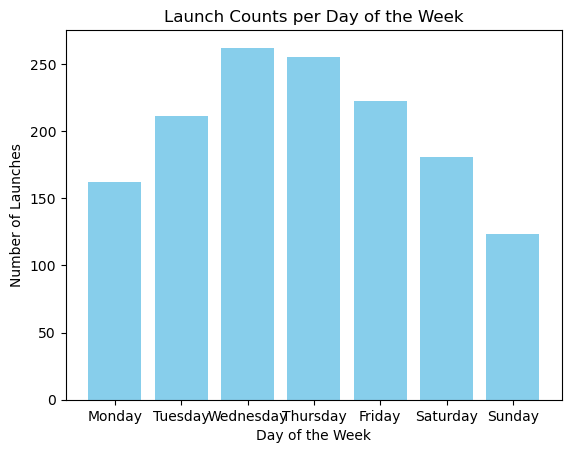

In [ ]:
# Convert the 'Date of Launch' column to datetime format
df['Date of Launch'] = pd.to_datetime(df['Date of Launch'], format='%m/%d/%Y')
# Date of launch 열의 문자열 값을 datetime 형식으로 변한합니다. 여기서 날짜 형식은 월/일/년도 입니다.

# Extract the day of the week from the 'Date of Launch' column
df['day_of_week'] = df['Date of Launch'].dt.dayofweek
# 열에서 요일을 추출합니다. 요일은 0*월요일) 부터 6(일요일) 까지의 숫자로 표현합니다.

# Count the number of launches per day of the week
launch_counts = df['day_of_week'].value_counts().sort_index()
# sort_index() -> 인덱스를 기준으로 정렬합니다다
# Create a bar plot
plt.bar(launch_counts.index, launch_counts.values, color='skyblue')
plt.title('Launch Counts per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Launches')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

#### Let's look for seasonal variations. take a look at t.dayofyear. Make a histogram of the day of year (of the launch). Anything you can hypothesize about how the aerospace industry sets the deadlines?

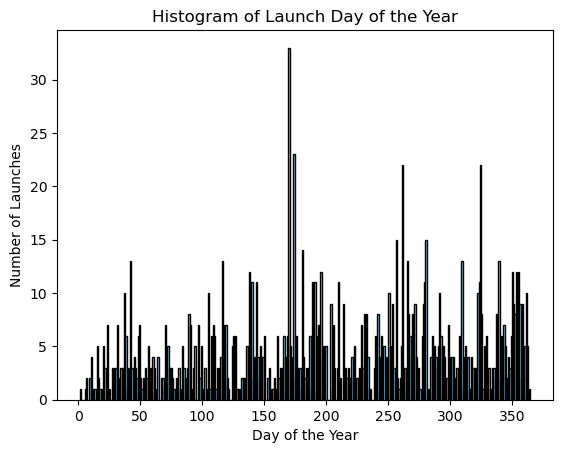

In [77]:
df['Date of Launch'] = pd.to_datetime(df['Date of Launch'], format='%m/%d/%Y')

# Extract the day of the year from the 'Date of Launch' column
df['day_of_year'] = df['Date of Launch'].dt.dayofyear

# Create a histogram of the day of the year
plt.hist(df['day_of_year'], bins=365, color='skyblue', edgecolor='black')
plt.title('Histogram of Launch Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Number of Launches')
plt.show()

## SpaceX market share

#### Find how many satellites per year were launched by SpaceX (Their rocket names all start with "Falcon")

In [79]:
df['Date of Launch'] = pd.to_datetime(df['Date of Launch'], format='%m/%d/%Y')

# Filter the DataFrame for SpaceX launches (rocket names starting with "Falcon")
spacex_launches = df[df['Launch Vehicle'].str.startswith('Falcon')]

# Extract the year from the 'Date of Launch' column
spacex_launches['year'] = spacex_launches['Date of Launch'].dt.year

# Count the number of launches per year
launch_counts_per_year = spacex_launches['year'].value_counts().sort_index()

print(launch_counts_per_year)

year
2013     3
2014     9
2015    14
2016     6
Name: count, dtype: int64


C:\Users\da980\AppData\Local\Temp\ipykernel_23084\4030788818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spacex_launches['year'] = spacex_launches['Date of Launch'].dt.year


#### What percentage of total number of launches this represents (again, per year)

In [80]:
df['Date of Launch'] = pd.to_datetime(df['Date of Launch'], format='%m/%d/%Y')

# Filter the DataFrame for SpaceX launches (rocket names starting with "Falcon")
spacex_launches = df[df['Launch Vehicle'].str.startswith('Falcon')]

# Extract the year from the 'Date of Launch' column
df['year'] = df['Date of Launch'].dt.year
spacex_launches['year'] = spacex_launches['Date of Launch'].dt.year

# Count the total number of launches per year
total_launches_per_year = df['year'].value_counts().sort_index()

# Count the number of SpaceX launches per year
spacex_launches_per_year = spacex_launches['year'].value_counts().sort_index()

# Calculate the percentage of SpaceX launches per year
percentage_spacex_launches_per_year = (spacex_launches_per_year / total_launches_per_year) * 100

# Display the percentages
print(percentage_spacex_launches_per_year)

year
1974         NaN
1978         NaN
1988         NaN
1989         NaN
1990         NaN
1991         NaN
1992         NaN
1993         NaN
1994         NaN
1995         NaN
1996         NaN
1997         NaN
1998         NaN
1999         NaN
2000         NaN
2001         NaN
2002         NaN
2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007         NaN
2008         NaN
2009         NaN
2010         NaN
2011         NaN
2012         NaN
2013    2.459016
2014    6.000000
2015    8.092486
2016    8.000000
Name: count, dtype: float64


C:\Users\da980\AppData\Local\Temp\ipykernel_23084\1608399729.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spacex_launches['year'] = spacex_launches['Date of Launch'].dt.year


#### For 2015 compare this information to what you can find on the web. (Note that a single rocket often launches multiple satellites.)

C:\Users\da980\AppData\Local\Temp\ipykernel_23084\1833567090.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spacex_launches['year'] = spacex_launches['Date of Launch'].dt.year


## What are satellites used for

#### What percentage of all satellites have commercial use?
 * Note that the Users columns has dual use values like Government/Commercial

#### What percentage have more than one use? (e.g. Government/Commercial or Commercial/Gov/Mil etc.)

## Orbits

#### Count how many satellites thre are per each Class of orbit. Note that 'LEO' appears twice, the scond time for a single row. Find out why and fix it.
 * LEO stands for Low Earth Orbit - this is where the ISS is
 * GEO is the Geostationary orbit - TV satellites

#### How low the Low Earth Orbit is? Find the median of the apogee for satellites on LEO. Apogee is the highest point of the orbit (perigee is the lowest).

#### Plot a histogram of the apogee for all satellites on LEO 

#### The histogram looks wrong, there is only one bar and the X axis goes all the way to above 300,000 km. Orbits above 2000 km are not usually called LEO. What's the problem? How can we fix it?

#### Plot a histogram of the apogee for all satelites with apogee below 60,000 km. The two large peaks you see are the LEO and GEO orbits 
 * Take a look at [this visualization of the different orbits on Wikipedia](https://upload.wikimedia.org/wikipedia/commons/b/b4/Comparison_satellite_navigation_orbits.svg)

#### Run a linear regression to predict the `Expected Lifetime (Years)` column from some of the other fetures
Note, the Expected Lifetime column contains some irregular data like `"14yrs"` it has to be converted to numbers